# Pymaceuticals Inc.
---

### Analysis
 

- With Capomulin, there is a strong correlation between the mouse weight and tumor volume. 

- Heavier mice tend to have bigger tumors. 

- Capomulin and Ramicane reduced the sizes of tumors the best out of the drugs tested.  

- Most mice were treated with Capomulin and Ramicane as well. 

- Mouse ID# L509 responded well to Capomulin treatment, their tumor volume went down over the course of the 45 days. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the unique number of mice. using .unique()
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# to check for duplicates, there is a duplicated function
# use .duplicated()
# uses .loc to use the DF and duplicated function,
# from there we look for duplicates as well as timepoints

duplicate_mouse_ids= study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
# what this does is creates a new data set, 
# looks within the study data data set [] for duplicates of Mouse ID as well as timepoints. 
# then it will strictly only get the mouse id ( , "MouseID")
# then using uniques it will return a list of duplicate Mouse ID's

duplicate_mouse_ids[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# what this does is creates a new DF using the complete DF and locates using the column Mouse ID, the mouse ID equal to our duplicate retrieved above.
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use .isin()


clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# calculate the means
#means = clean_study_data_complete.groupby("Drug Regimen").mean()
#means["Tumor Volume (mm3)"]

mean = clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#generate a summary dictionary
# Mean Tumor Volume 
medians = clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).median()
medians

variance = clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).var()
variance

stds = clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).std()
stds

sems = clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).sem()
sems

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


summaryDictionary = {
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : medians,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev." : stds,
    "Tumor Volume Std. Err.": sems,
}

df = pd.DataFrame(summaryDictionary)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_study_data_complete.groupby('Drug Regimen').agg(
    {"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}

)

df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# generate the series for all drug regimens
# counts of timepoints - occurances of each drug
drug_count = clean_study_data_complete["Drug Regimen"].value_counts()
drug_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

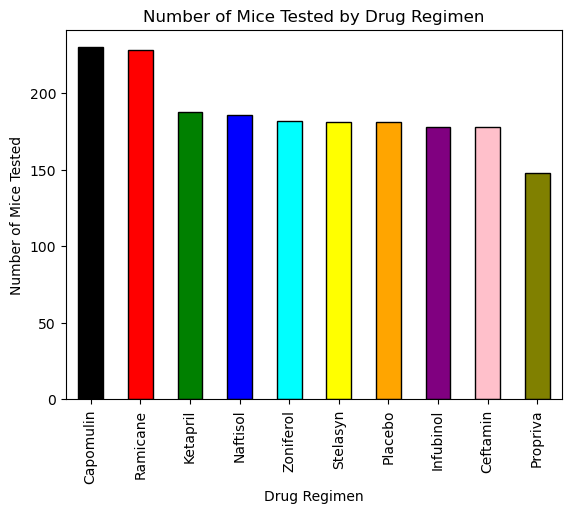

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count.plot(kind="bar",
           color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink', 'olive', 'brown'],
           edgecolor='black')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [13]:
drug_count.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [14]:
drug_count.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

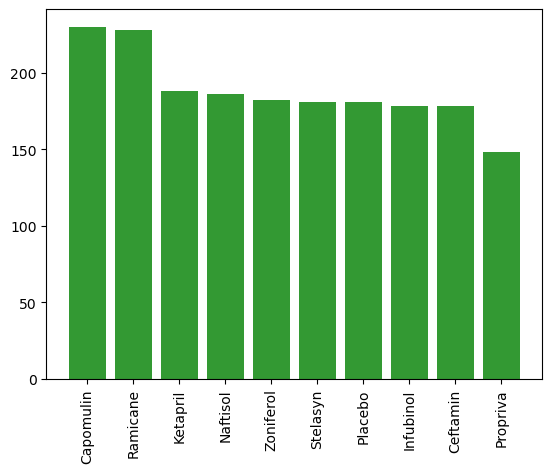

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_count.index.values
y_axis = drug_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='green', alpha=0.8, align='center')
plt.xticks(rotation=90)
plt.show()

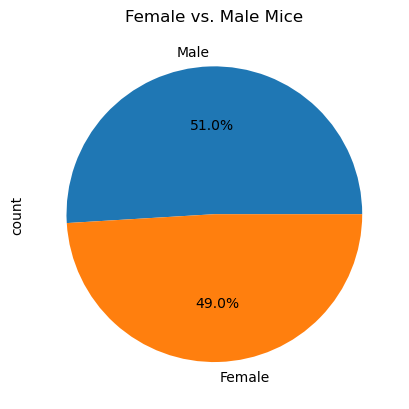

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_study_data_complete["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

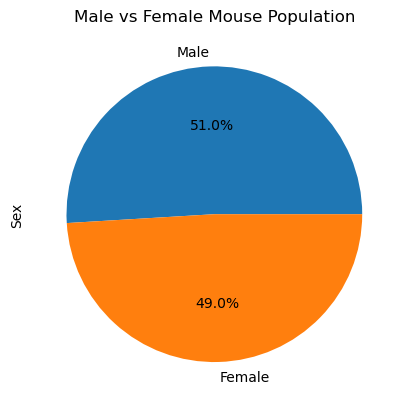

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Start by getting the last (greatest) timepoint for each mouse
#creates a series
maxTime= clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
# to convert the series to a dataframe, reset the index
maxTime = maxTime.reset_index()
maxTime.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [19]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
#merge the data for the max timepoints of each mouse only
merged_data = maxTime.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



In [22]:
for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    #do i have rows that match each drug
final_tumor_vol

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Create / recreate empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    #do i have rows that match each drug
    #add to the empty tumor vol list
    tumor_vol_list.append(final_tumor_vol)
    #add each series to the empty list

tumor_vol_list #prints a list of series
#this will print out the list for each drug, in the order of the list.
    

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [24]:
# Create / recreate empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    #do i have rows that match each drug
    #add to the empty tumor vol list
    tumor_vol_list.append(final_tumor_vol)
    #add each series to the empty list
    quartiles =final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # add subset 
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if len(outliers) ==0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
        print(output)


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers: None


In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # add subset 

    
    # Determine outliers using upper and lower bounds


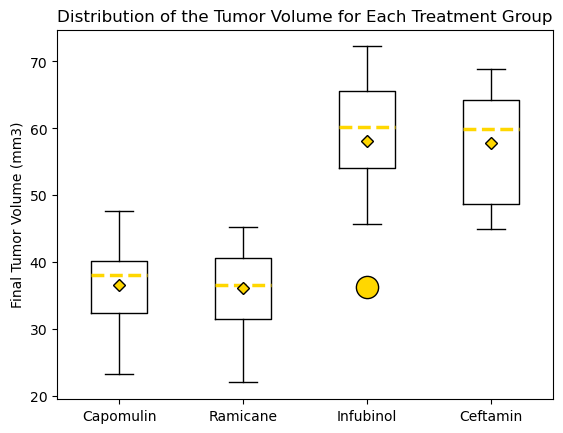

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='gold', markersize=16,
                 markeredgecolor='black')
# customize the median line with medianprops
medianprops = dict(linestyle='--', linewidth=2.5,color='gold')

# customize the mean points with meanpointprops
meanpointprops = dict(marker='D', markeredgecolor='black',
                     markerfacecolor='gold')

plt.boxplot(tumor_vol_list, labels= treatment_list, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops,
           showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of the Tumor Volume for Each Treatment Group')
plt.show()


## Line and Scatter Plots

In [27]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
capomulin_df = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] =="Capomulin"]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


Text(0, 0.5, 'Tumor Volume (mm3)')

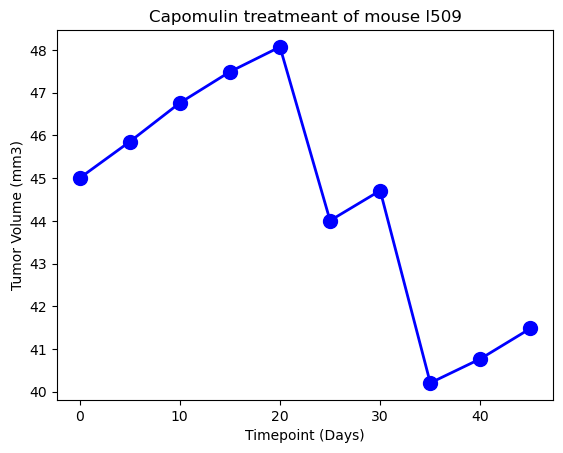

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
l509_df.head()

x_axis = l509_df["Timepoint"]
tumsiz = l509_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=10,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [30]:
capomuilinAveragesDF= capomulin_df.groupby("Mouse ID").mean()
capomuilinAveragesDF.head()

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()

marker_size=15
plt.scatter(capomuilinAveragesDF['Weight (g)'],
            capomuilinAveragesDF['Tumor Volume (mm3)'], 
            facecolor="blue",
           edgecolor="black")

plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [ ]:
corr = st.capomuilinAveragesDF(capomuilinAveragesDF['Weight (g)'],capomuilinAveragesDF['Tumor Volume (mm3)'])[0]
print(f" The correlation between mouse weight and the average tumor volume is {corr:.2f}")


In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomuilinAveragesDF['Weight (g)']
y_values = capomuilinAveragesDF['Tumor Volume (mm3)']

(slope, intercept,rvalue, pvalue, stderr)= linregress(capomuilinAveragesDF["Weight (g)"],
                                                      capomuilinAveragesDF["Tumor Volume (mm3)"])
                                                      
regressValues = x_values * slope + intercept
line_eq= f"y = {slope:.2f)}x + {intercept:.2f)}"

plt.scatter(capomuilinAveragesDF["Weight (g)"],capomuilinAveragesDF["Tumor Volume (mm3)"],color='b')
plt.plot(capomuilinAveragesDF["Weight (g)"], regressValues, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()